In [7]:
import numpy as np
import torch
from torch.utils.data import DataLoader

from src.data import IDAOData, train_transforms, val_transforms

import matplotlib.pyplot as plt

In [2]:
train_ds = IDAOData('data/train', transform=train_transforms())
val_ds = IDAOData('data/val', transform=val_transforms())
test_ds = IDAOData('data/test', transform=val_transforms())
test_holdout_ds = IDAOData('data/test_holdout', transform=val_transforms())

In [14]:
image, r_type, energy = train_ds[0]

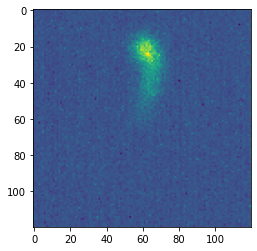

In [8]:
plt.imshow(train_ds[0][0])

In [46]:
def plot_pixel_distr(image, r_type, energy):
    fig, axis = plt.subplots()
    axis.hist(image.ravel().clip(-0.5, 1), bins=31)
    axis.set_title(f'''r_type: {r_type} 
    energy: {energy} 
    min value: {image.min():.2f}, max value: {image.max():.2f}''')
    plt.show()

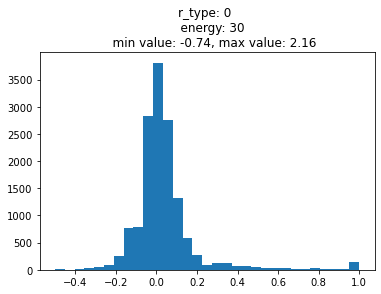

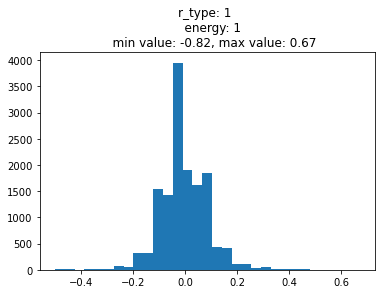

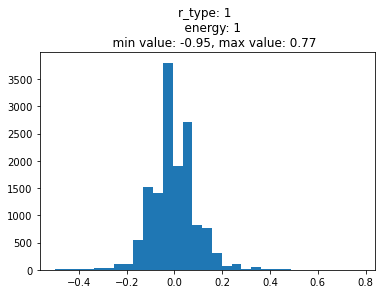

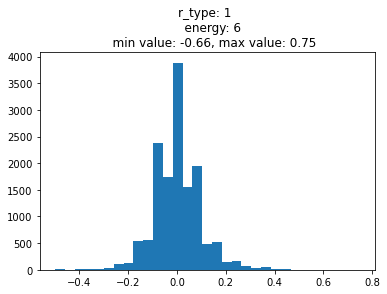

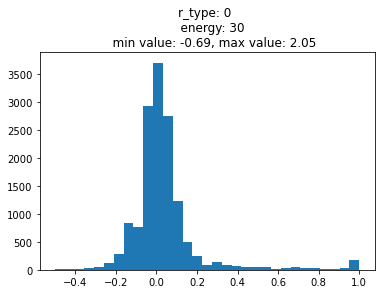

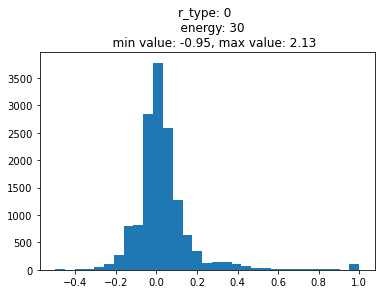

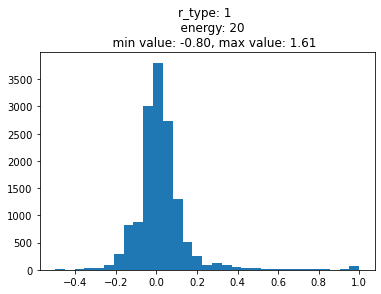

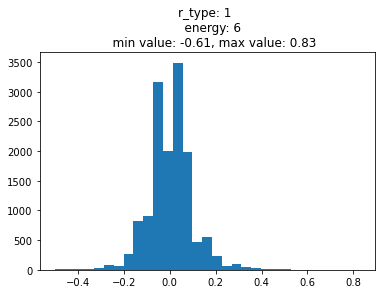

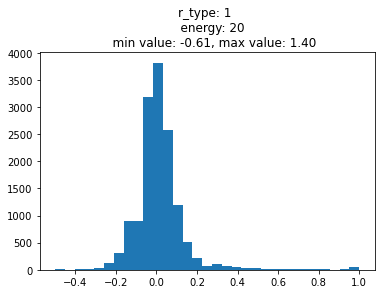

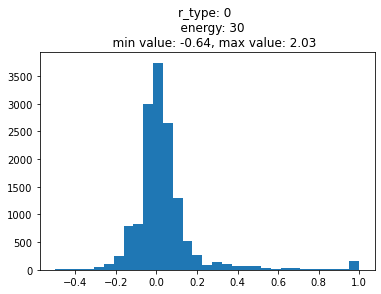

In [49]:
for idx in range(10):
    (image, r_type, energy) = train_ds[idx]
    plot_pixel_distr(image, r_type, energy)

In [67]:
def get_features(image):
    thresholds = np.concatenate((
        [-np.inf], 
        np.arange(-1, 2.2, 0.1), 
        [np.inf],
    ))
    out = []
    for lower, upper in zip(thresholds[:-1], thresholds[1:]):
        mask = ((lower <= image) 
              & (image < upper))
        out.append(mask.sum())
    return np.array(out)

In [75]:
def create_X_y(train_ds, idces=range(10)):
    X, y_r_type, y_energy = [], [], []
    for idx in idces:
        (image, r_type, energy) = train_ds[idx]
        X.append(get_features(image))
        y_r_type.append(r_type)
        y_energy.append(energy)

    X = np.array(X)
    y_r_type = np.array(y_r_type)
    y_energy = np.array(y_energy)
    
    return X, y_r_type, y_energy

In [76]:
X, y_r_type, y_energy = create_X_y(train_ds)

In [77]:
X, y_r_type, y_energy

(array([[   0,    0,    0,    1,    4,    4,   13,   32,  135, 1011, 5561,
         5443, 1224,  270,  211,  120,   71,   58,   46,   33,   32,   30,
           23,   16,    9,   12,   13,   12,    5,    6,    2,    1,    2],
        [   0,    0,    1,    2,    3,    2,   21,   31,  143, 1230, 6334,
         5366,  972,  155,   98,   34,    5,    3,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    1,    0,    0,    1,    5,   13,   42,  158, 1204, 6167,
         5431, 1077,  176,   78,   32,    9,    5,    1,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    3,    7,   10,   31,  149, 1227, 6153,
         5343, 1131,  202,  103,   29,   10,    1,    1,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    4,    3,   15,   27,  171, 1124, 5609,
         5304, 1126, 

In [74]:
import xgboost

In [78]:
clf = xgboost.XGBClassifier()

In [ ]:
xgboost.XGBRegressor()

In [ ]:
clf.fit()